## RAINFALL AND TEMPERATURE PREDICTION USING MACHINE LEARNING 

### Project Aim: ###

####    The aim of this project is to develop a machine learning model to predict temperature and rainfall based on environmental features, with a specific focus on six air quality parameters identified by the World Health Organization (WHO). The study investigates the contribution of these air quality indicators to climate change outcomes, particularly temperature fluctuations and rainfall patterns, enabling data-driven insights into the environmental impact of air pollution.


# PROJECT WORKING 

## Tools & Libraries Used initially

##### Pandas (pandas)
##### Used for efficient data manipulation and analysis. It allows loading, cleaning, transforming, and analyzing structured data in DataFrames, making it easier to handle large environmental datasets.

##### NumPy (numpy)
##### Provides support for high-performance numerical computations and working with large multi-dimensional arrays and matrices. It's essential for mathematical operations on the dataset.

##### Matplotlib (matplotlib.pyplot)
##### A foundational library for creating static, interactive, and animated visualizations in Python. It is used here for generating basic plots to understand data distributions and trends.

##### Seaborn (seaborn)
##### Built on top of Matplotlib, Seaborn offers a higher-level interface for creating attractive and informative statistical graphics. It is used for advanced visualization, such as heatmaps and correlation plots, to explore relationships between air quality parameters and climate variables.

In [1]:
import pandas as pd  # For data manipulation
import numpy as np   # For numerical computations
import matplotlib.pyplot as plt  # For basic visualization
import seaborn as sns  # For advanced visualization

## Data Loading

##### This line loads the dataset named "IndianWeatherRepository.xlsx" into a Pandas DataFrame called df. The dataset is assumed to contain historical weather and air quality data relevant to India. This Excel file serves as the primary data source for training and evaluating the machine learning model. Using Pandas enables efficient handling of tabular data, making it easier to perform data preprocessing, feature engineering, and exploratory data analysis (EDA).

In [3]:
df = pd.read_excel("IndianWeatherRepository.xlsx")

## Initial Data Inspection

##### This command displays the first five rows of the DataFrame df, allowing for a quick overview of the dataset’s structure and content. It helps verify that the data has been loaded correctly and provides insight into the columns, data types, and potential issues such as missing or inconsistent values. This step is commonly used as part of the exploratory data analysis (EDA) process.

In [4]:
print(df.head())

  country location_name          region  latitude  longitude      timezone  \
0   India    Ashoknagar  Madhya Pradesh     24.57      77.72  Asia/Kolkata   
1   India        Raisen  Madhya Pradesh     23.33      77.80  Asia/Kolkata   
2   India    Chhindwara  Madhya Pradesh     22.07      78.93  Asia/Kolkata   
3   India         Betul  Madhya Pradesh     21.86      77.93  Asia/Kolkata   
4   India   Hoshangabad  Madhya Pradesh     22.75      77.72  Asia/Kolkata   

   last_updated_epoch        last_updated  temperature_celsius  \
0          1693286100 2023-08-29 10:45:00                 27.5   
1          1693286100 2023-08-29 10:45:00                 27.5   
2          1693286100 2023-08-29 10:45:00                 26.3   
3          1693286100 2023-08-29 10:45:00                 25.6   
4          1693286100 2023-08-29 10:45:00                 27.2   

   temperature_fahrenheit  ... air_quality_PM2.5  air_quality_PM10  \
0                    81.5  ...              12.6              18

## Dataset Dimensions

##### This attribute returns a tuple representing the dimensions of the DataFrame:

##### The first value indicates the number of rows (i.e., total records or observations).

##### The second value indicates the number of columns (i.e., features or variables).

##### It is commonly used to quickly assess the size of the dataset and ensure that it aligns with expectations before proceeding with further analysis or modeling.

In [5]:
df.shape

(6562, 42)

## Missing Value Analysis

##### This command checks for missing (null) values in the dataset. It returns a count of null values in each column, helping identify features with incomplete or missing data.
##### This step is crucial in the data cleaning process, as handling missing values properly (e.g., through imputation or removal) ensures better model performance and reliability.

In [6]:
print(df.isnull().sum())

country                         0
location_name                   0
region                          0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Oz

## Data Type Inspection

##### This attribute displays the data types of each column in the DataFrame. It helps in understanding the nature of the variables — whether they are integers, floats, objects (strings), or datetime types.
##### Identifying data types is an essential step in data preprocessing, as it guides how each feature should be handled, encoded, or transformed before feeding into a machine learning model.

In [7]:
df.dtypes

country                                 object
location_name                           object
region                                  object
latitude                               float64
longitude                              float64
timezone                                object
last_updated_epoch                       int64
last_updated                    datetime64[ns]
temperature_celsius                    float64
temperature_fahrenheit                 float64
condition_text                          object
wind_mph                               float64
wind_kph                               float64
wind_degree                              int64
wind_direction                          object
pressure_mb                              int64
pressure_in                            float64
precip_mm                              float64
precip_in                              float64
humidity                                 int64
cloud                                    int64
feels_like_ce

## Data Visualization: Temperature and Rainfall Distribution

##### The visualization section uses Matplotlib and Seaborn libraries to explore the distribution of key target variables: temperature and rainfall (precipitation).

##### Seaborn’s histplot function is utilized to create histograms with kernel density estimates (KDE) to display the frequency distribution and smooth probability density of the data.

##### Two side-by-side subplots are created:

##### Temperature Distribution: Shows the spread and frequency of temperature values (in degrees Celsius), helping identify common temperature ranges and detect any anomalies or outliers.

##### Rainfall Distribution: Illustrates the distribution of precipitation amounts (in millimeters), providing insight into rainfall patterns and variability in the dataset.

##### The use of distinct colors (skyblue for temperature and salmon for rainfall) improves visual distinction between the two variables.

##### This exploratory visualization aids in understanding the underlying data characteristics before applying machine learning models.



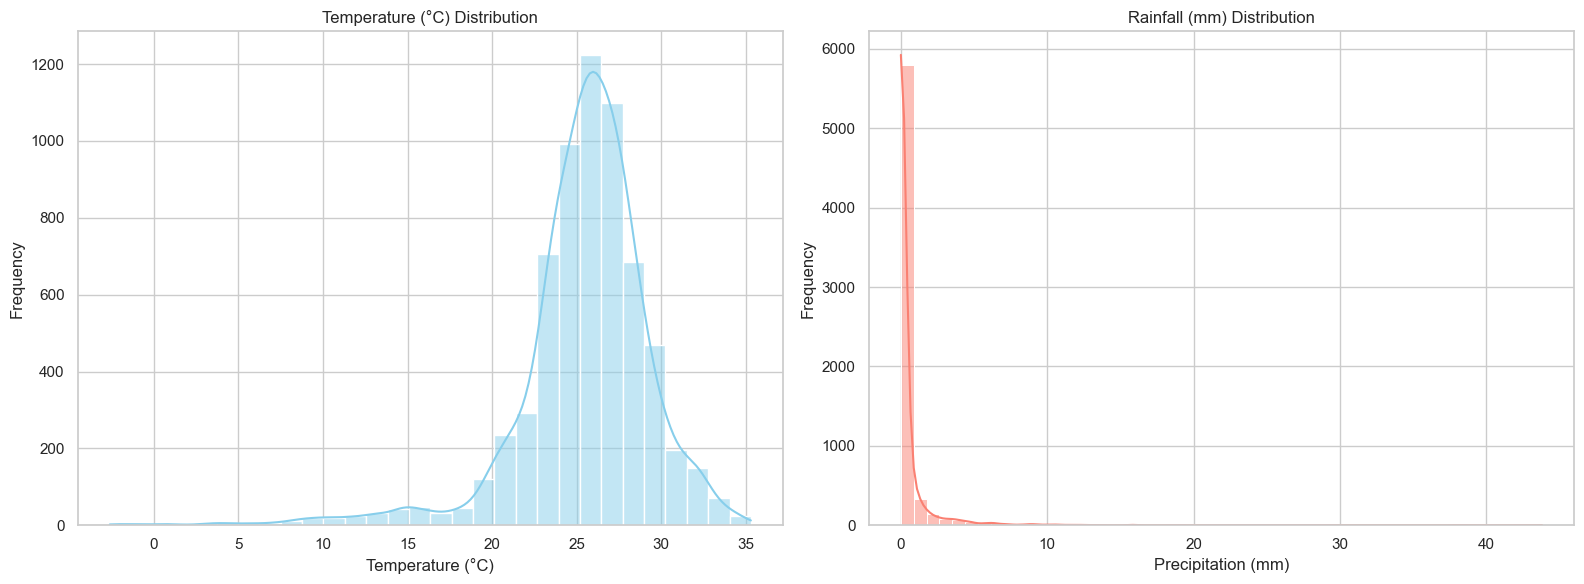

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style
sns.set(style="whitegrid")

# Create subplots for temperature and rainfall distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Temperature distribution
sns.histplot(df["temperature_celsius"], kde=True, bins=30, ax=axes[0], color="skyblue")
axes[0].set_title("Temperature (°C) Distribution")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("Frequency")

# Rainfall (precipitation) distribution
sns.histplot(df["precip_mm"], kde=True, bins=50, ax=axes[1], color="salmon")
axes[1].set_title("Rainfall (mm) Distribution")
axes[1].set_xlabel("Precipitation (mm)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## balancing the data

##### In this phase of the project, we focus on preprocessing and visualizing rainfall data to enhance its suitability for machine learning models. A 

##### logarithmic transformation is applied to the rainfall values using log(precip_mm + 1) to handle the skewness commonly present in precipitation 

##### data, as most values tend to be low with a few extreme outliers. This transformation helps normalize the distribution, ensuring better performance

##### and stability of regression models. Additionally, a binary classification label is created to distinguish between rainy and non-rainy conditions, 

##### where a value of 1 indicates rainfall occurred and 0 indicates no rainfall. This binary feature is particularly useful for classification models 

##### aiming to predict the occurrence of rain. To better understand the transformed data, two visualizations are generated: a histogram of the log-

##### transformed rainfall values to observe the normalized distribution, and a bar chart depicting the balance between rain and no-rain instances in 

##### the dataset. These visualizations provide critical insights into the data distribution and class balance, both of which are essential for guiding 

##### the selection and evaluation of predictive models in the next stages of analysis.



C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\1219844162.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rain_occurred", data=df, ax=axes[1], palette="Set2")
C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\1219844162.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["No Rain", "Rain"])


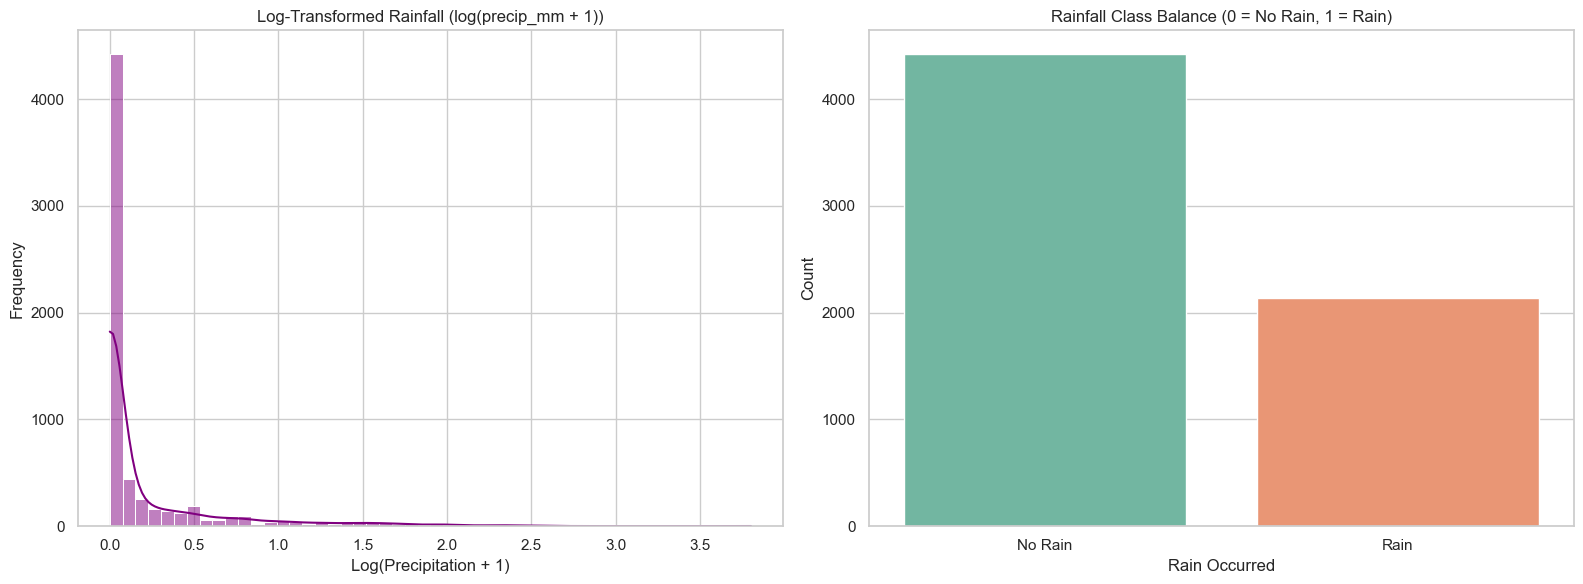

In [9]:
import numpy as np

# 1. Log transformation of rainfall (add 1 to avoid log(0))
df["log_precip_mm"] = np.log1p(df["precip_mm"])

# 2. Convert to binary classification: Rain (1) if precip > 0, else No Rain (0)
df["rain_occurred"] = (df["precip_mm"] > 0).astype(int)

# Visualize both
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Log-transformed rainfall distribution
sns.histplot(df["log_precip_mm"], kde=True, bins=50, ax=axes[0], color="purple")
axes[0].set_title("Log-Transformed Rainfall (log(precip_mm + 1))")
axes[0].set_xlabel("Log(Precipitation + 1)")
axes[0].set_ylabel("Frequency")

# Binary Rain class balance
sns.countplot(x="rain_occurred", data=df, ax=axes[1], palette="Set2")
axes[1].set_title("Rainfall Class Balance (0 = No Rain, 1 = Rain)")
axes[1].set_xlabel("Rain Occurred")
axes[1].set_ylabel("Count")
axes[1].set_xticklabels(["No Rain", "Rain"])

plt.tight_layout()
plt.show()


## Selected Features for Training


### Feature Categories and Justification
### 1. Geographic Features
#### latitude, longitude
#### Why Selected: Regional climate patterns vary significantly by location
#### Target Support:
#### Different latitudes have distinct temperature ranges
#### Coastal vs inland locations affect rainfall patterns
#### Geographic positioning influences seasonal weather variations

### 2. Core Meteorological Features
#### humidity - Water vapor content in air
#### wind_kph - Wind speed
#### cloud - Cloud coverage percentage
#### pressure_mb - Atmospheric pressure
#### uv_index - UV radiation intensity
#### feels_like_celsius - Apparent temperature
#### Why Selected: These are fundamental weather parameters that directly influence temperature and rainfall Target Support:

#### Humidity: Strong predictor for both rainfall occurrence and temperature perception
#### Cloud cover: Essential for precipitation formation and temperature regulation
#### Pressure: Low pressure systems bring rain; pressure affects temperature
#### Wind: Influences temperature distribution and precipitation patterns
#### UV Index: Correlates with clear skies (less rain) and higher temperatures

### 3. WHO Air Quality Parameters (Project Focus)
#### air_quality_Carbon_Monoxide (CO)
#### air_quality_Ozone (O₃)
#### air_quality_Nitrogen_dioxide (NO₂)
#### air_quality_Sulphur_dioxide (SO₂)
#### air_quality_PM2.5 - Fine particulate matter
#### air_quality_PM10 - Coarse particulate matter
#### Why Selected: These are the WHO's six key air quality indicators Project Alignment: Your aim is to investigate how these air quality parameters contribute to climate change outcomes

### How Features Support Target Variables
### Target 1: Temperature Prediction (temperature_celsius)
#### Strong Supporters:
#### feels_like_celsius - Direct temperature relationship
#### uv_index - Higher UV = warmer conditions
#### latitude - Fundamental climate determinant
#### humidity - Affects heat perception and actual temperature
#### cloud - Cloud cover reduces temperature
#### Air Quality Impact:
#### PM2.5/PM10 can create atmospheric haze affecting temperature
#### Industrial pollutants may correlate with urban heat islands
#### Ozone levels can indicate weather patterns

### Target 2: Rainfall Prediction (log_precip_mm)
#### Strong Supporters:
#### humidity - Essential for precipitation
#### cloud - Direct rainfall predictor
#### pressure_mb - Low pressure brings rain
#### wind_kph - Affects precipitation patterns
#### uv_index - Inversely related (rain = less UV)
#### Air Quality Impact:
#### Pollutants can act as condensation nuclei
#### Air quality affects cloud formation processes
#### Industrial emissions may influence local precipitation

### Target 3: Rain Occurrence Classification (rain_occurred)
#### Binary Classification Supporters:
#### cloud - Primary rain indicator
#### humidity - Moisture availability
#### pressure_mb - Weather system indicator
#### uv_index - Clear sky indicator (negative correlation)
#### Feature Selection Rationale
#### Comprehensive Coverage:
#### Physical Geography: Location-based climate patterns
#### Atmospheric Conditions: Direct weather influencers
#### Air Quality: Environmental pollution impact (project focus)

### WHO Alignment:
#### The inclusion of all six WHO air quality parameters specifically addresses your research question: "How do air quality indicators contribute to climate change outcomes?"
#### Predictive Power:
#### Meteorological features provide baseline climate prediction capability
#### Air quality features add the environmental impact layer
#### Geographic features account for regional variations
#### Feature Completeness
#### This feature set is well-designed because it:
#### Covers all major weather-influencing factors
#### Includes the specific WHO air quality focus of your study
#### Balances direct weather predictors with environmental impact indicators
#### Provides both continuous and categorical information for robust model training
#### he 14 selected features create a comprehensive dataset that can effectively predict temperature and rainfall while investigating the specific environmental impact of air pollution on climate patterns, which perfectly aligns with your project's research objectives.

                              with_log_precip  with_temperature  \
rain_occurred                        0.647479         -0.098226   
cloud                                0.462714         -0.123038   
humidity                             0.391992         -0.368048   
longitude                            0.156288          0.068921   
air_quality_Sulphur_dioxide          0.024860          0.102749   
wind_kph                            -0.009842          0.165314   
air_quality_Nitrogen_dioxide        -0.015632          0.092026   
air_quality_Carbon_Monoxide         -0.025488          0.152635   
feels_like_celsius                  -0.048904          0.975542   
pressure_mb                         -0.089099         -0.425083   
uv_index                            -0.090521          0.437339   
temperature_celsius                 -0.101228               NaN   
air_quality_PM2.5                   -0.139045          0.207734   
air_quality_Ozone                   -0.143719          0.16193

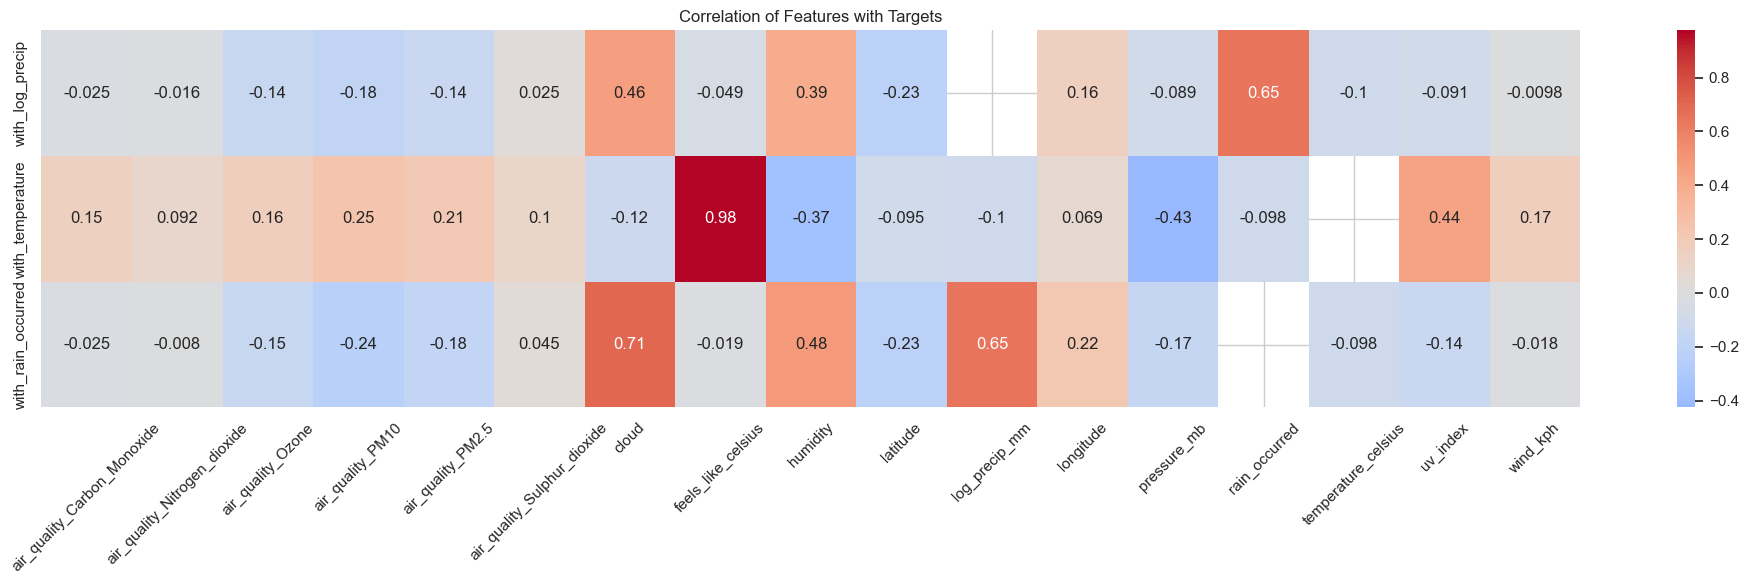

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature list
features = [
    "latitude", "longitude", "humidity", "wind_kph", "cloud", "pressure_mb", "uv_index", "feels_like_celsius",
    "air_quality_Carbon_Monoxide", "air_quality_Ozone", "air_quality_Nitrogen_dioxide",
    "air_quality_Sulphur_dioxide", "air_quality_PM2.5", "air_quality_PM10"
]

# Targets
y_rainfall = df["log_precip_mm"]
y_temp = df["temperature_celsius"]
y_cls = df["rain_occurred"]

# Create a new DataFrame that includes all features + targets
corr_df = df[features].copy()
corr_df["log_precip_mm"] = y_rainfall
corr_df["temperature_celsius"] = y_temp
corr_df["rain_occurred"] = y_cls

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Extract correlation of features with each target
corr_with_rainfall = corr_matrix["log_precip_mm"].drop("log_precip_mm")
corr_with_temp = corr_matrix["temperature_celsius"].drop("temperature_celsius")
corr_with_cls = corr_matrix["rain_occurred"].drop("rain_occurred")

combined_corr = pd.DataFrame({
    "with_log_precip": corr_with_rainfall,       
    "with_temperature": corr_with_temp,
    "with_rain_occurred": corr_with_cls
})

# Sort and print
print(combined_corr.sort_values(by="with_log_precip", ascending=False))

# Plot
plt.figure(figsize=(20, 6))
sns.heatmap(combined_corr.T, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Features with Targets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  random forest model

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import KBinsDiscretizer

# -------------------------------------
# Load and preprocess data
# -------------------------------------
# Assuming df is already loaded
# Example: df = pd.read_excel("IndianWeatherRepository.xlsx")

# Drop redundant column if it exists
df = df.drop(columns=['feels_like_fahrenheit'], errors='ignore')

# Log-transform rainfall to reduce skewness
df["log_precip_mm"] = np.log1p(df["precip_mm"])

# Create binary classification column for rain occurrence
df["rain_occurred"] = (df["precip_mm"] > 0).astype(int)

# -------------------------------------
# Define features and targets
# -------------------------------------
features = [
    "latitude","longitude","humidity","wind_kph","cloud","pressure_mb","uv_index", "feels_like_celsius",
    "air_quality_Carbon_Monoxide", "air_quality_Ozone", "air_quality_Nitrogen_dioxide",
    "air_quality_Sulphur_dioxide", "air_quality_PM2.5", "air_quality_PM10"
]

X = df[features]

# Targets
y_rainfall = df["log_precip_mm"]
y_temp = df["temperature_celsius"]
y_cls = df["rain_occurred"]

# -------------------------------------
# Train-test splits for each task
# -------------------------------------
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(
    X, y_rainfall, test_size=0.2, random_state=42)

X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
    X, y_temp, test_size=0.2, random_state=42)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y_cls, test_size=0.2, random_state=42)

# -------------------------------------
# Temperature Classification (Cold, Mild, Hot)
# -------------------------------------
temp_values = y_temp.values.reshape(-1, 1)
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
y_temp_binned = binner.fit_transform(temp_values).astype(int).ravel()

X_train_temp_cls, X_test_temp_cls, y_train_temp_cls, y_test_temp_cls = train_test_split(
    X, y_temp_binned, test_size=0.2, random_state=42)

# -------------------------------------
# Compute class weights for rain classification
# -------------------------------------
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_cls), y=y_cls)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_cls), class_weights)}

# -------------------------------------
# Rainfall Regression
# -------------------------------------
rain_regressor = RandomForestRegressor(random_state=42)
rain_regressor.fit(X_train_rain, y_train_rain)

y_pred_rain_log = rain_regressor.predict(X_test_rain)
y_pred_rain_mm = np.expm1(y_pred_rain_log)
y_test_rain_mm = np.expm1(y_test_rain)

rainfall_mse = mean_squared_error(y_test_rain_mm, y_pred_rain_mm)
print("📉 Rainfall Regression MSE:", rainfall_mse)

# -------------------------------------
# Temperature Regression
# -------------------------------------
temp_regressor = RandomForestRegressor(random_state=42)
temp_regressor.fit(X_train_temp, y_train_temp)

y_pred_temp = temp_regressor.predict(X_test_temp)
temp_mse = mean_squared_error(y_test_temp, y_pred_temp)
print("🌡️ Temperature Regression MSE:", temp_mse)

# -------------------------------------
# Rain Occurrence Classification
# -------------------------------------
classifier = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)
classifier.fit(X_train_cls, y_train_cls)

y_pred_cls = classifier.predict(X_test_cls)

print("\n✅ Rain Occurrence Classification Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_cls))

print("\n✅ Rain Occurrence Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))

print("✅ Rain Occurrence Classification Accuracy:", accuracy_score(y_test_cls, y_pred_cls))

# -------------------------------------
# Temperature Classification (Binned)
# -------------------------------------
temp_classifier = RandomForestClassifier(random_state=42)
temp_classifier.fit(X_train_temp_cls, y_train_temp_cls)

y_pred_temp_cls = temp_classifier.predict(X_test_temp_cls)

print("\n✅ Temperature Classification Confusion Matrix:")
print(confusion_matrix(y_test_temp_cls, y_pred_temp_cls))

print("\n✅ Temperature Classification Report:")
print(classification_report(y_test_temp_cls, y_pred_temp_cls))

print("✅ Temperature Classification Accuracy:", accuracy_score(y_test_temp_cls, y_pred_temp_cls))


c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


📉 Rainfall Regression MSE: 3.9522596032049524
🌡️ Temperature Regression MSE: 0.05381898095963439

✅ Rain Occurrence Classification Confusion Matrix:
[[823  62]
 [ 37 391]]

✅ Rain Occurrence Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       885
           1       0.86      0.91      0.89       428

    accuracy                           0.92      1313
   macro avg       0.91      0.92      0.92      1313
weighted avg       0.93      0.92      0.93      1313

✅ Rain Occurrence Classification Accuracy: 0.9246001523229246

✅ Temperature Classification Confusion Matrix:
[[416  11   0]
 [  5 384  13]
 [  0  10 474]]

✅ Temperature Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       427
           1       0.95      0.96      0.95       402
           2       0.97      0.98      0.98       484

    accuracy                           0.97    

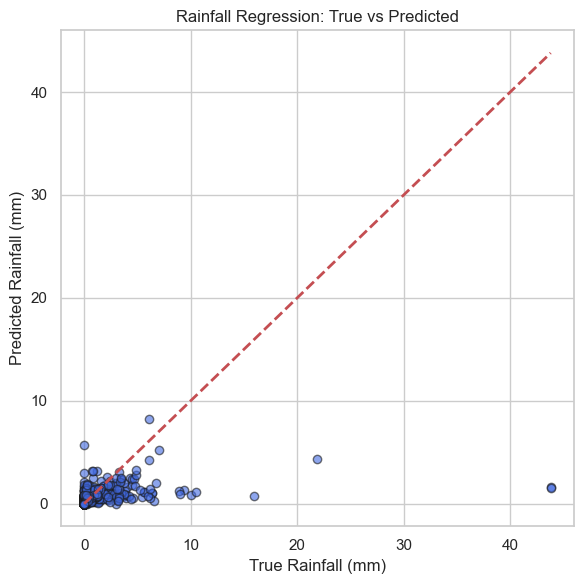

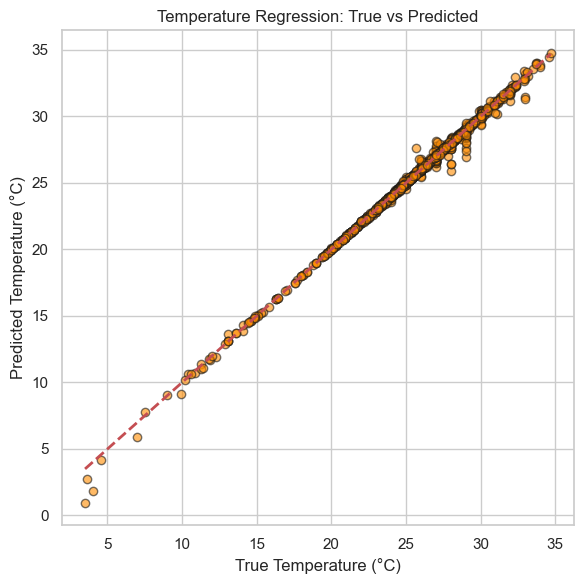

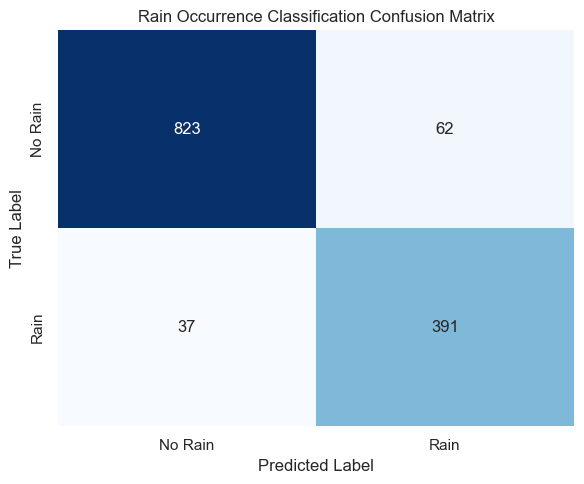

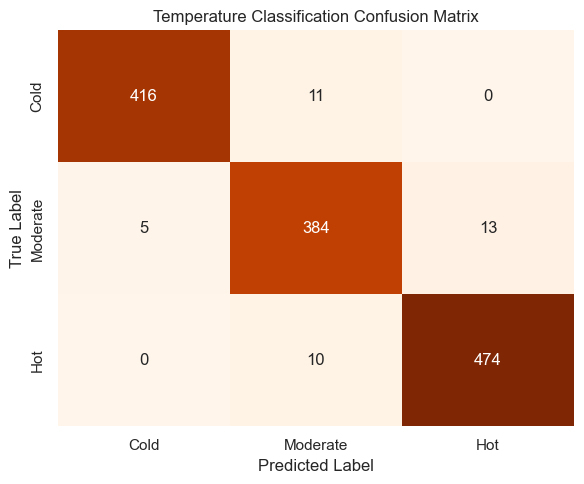

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure these predictions have already been made:
# y_pred_rain_mm, y_test_rain_mm
# y_pred_temp, y_test_temp
# y_pred_cls, y_test_cls
# y_pred_temp_cls, y_test_temp_cls

# --- Compute Confusion Matrices for Classification ---
cm_cls = confusion_matrix(y_test_cls, y_pred_cls)
cm_temp_cls = confusion_matrix(y_test_temp_cls, y_pred_temp_cls)

# --- Regression Visualization: Rainfall ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_rain_mm, y_pred_rain_mm, alpha=0.6, color='royalblue', edgecolors='k')
plt.plot([y_test_rain_mm.min(), y_test_rain_mm.max()],
         [y_test_rain_mm.min(), y_test_rain_mm.max()], 'r--', lw=2)
plt.xlabel("True Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.title("Rainfall Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Regression Visualization: Temperature ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_temp, y_pred_temp, alpha=0.6, color='darkorange', edgecolors='k')
plt.plot([y_test_temp.min(), y_test_temp.max()],
         [y_test_temp.min(), y_test_temp.max()], 'r--', lw=2)
plt.xlabel("True Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Temperature Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Classification Visualization: Rain Occurrence Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_cls, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Rain Occurrence Classification Confusion Matrix')
plt.tight_layout()
plt.show()

# --- Classification Visualization: Temperature Classes Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_temp_cls, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Cold', 'Moderate', 'Hot'], yticklabels=['Cold', 'Moderate', 'Hot'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Temperature Classification Confusion Matrix')
plt.tight_layout()
plt.show()


## xgboost

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import KBinsDiscretizer
import xgboost as xgb

# -------------------------------------
# Load and preprocess data
# -------------------------------------
# df = pd.read_excel("IndianWeatherRepository.xlsx")  # Load your dataset

df = df.drop(columns=['feels_like_fahrenheit'], errors='ignore')
df["log_precip_mm"] = np.log1p(df["precip_mm"])
df["rain_occurred"] = (df["precip_mm"] > 0).astype(int)

# -------------------------------------
# Define features and targets
# -------------------------------------
features = [
    "latitude","longitude","humidity","wind_kph","cloud","pressure_mb","uv_index", "feels_like_celsius",
    "air_quality_Carbon_Monoxide", "air_quality_Ozone", "air_quality_Nitrogen_dioxide",
    "air_quality_Sulphur_dioxide", "air_quality_PM2.5", "air_quality_PM10"
]

X = df[features]
y_rainfall = df["log_precip_mm"]
y_temp = df["temperature_celsius"]
y_cls = df["rain_occurred"]

# -------------------------------------
# Train-test splits
# -------------------------------------
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(X, y_rainfall, test_size=0.2, random_state=42)
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y_temp, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.2, random_state=42)

# -------------------------------------
# Temperature Classification Binning
# -------------------------------------
temp_values = y_temp.values.reshape(-1, 1)
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
y_temp_binned = binner.fit_transform(temp_values).astype(int).ravel()
X_train_temp_cls, X_test_temp_cls, y_train_temp_cls, y_test_temp_cls = train_test_split(X, y_temp_binned, test_size=0.2, random_state=42)

# -------------------------------------
# Compute class weights for classification
# -------------------------------------
class_weights_rain = compute_class_weight('balanced', classes=np.unique(y_cls), y=y_cls)
class_weight_dict_rain = {cls: weight for cls, weight in zip(np.unique(y_cls), class_weights_rain)}

class_weights_temp = compute_class_weight('balanced', classes=np.unique(y_temp_binned), y=y_temp_binned)
class_weight_dict_temp = {cls: weight for cls, weight in zip(np.unique(y_temp_binned), class_weights_temp)}

# -------------------------------------
# Rainfall Regression - XGBoost
# -------------------------------------
xgb_reg_rain = xgb.XGBRegressor(n_jobs=-1, random_state=42)
xgb_reg_rain.fit(X_train_rain, y_train_rain)

y_pred_rain_log = xgb_reg_rain.predict(X_test_rain)
y_pred_rain_mm = np.expm1(y_pred_rain_log)
y_test_rain_mm = np.expm1(y_test_rain)
mse_rain = mean_squared_error(y_test_rain_mm, y_pred_rain_mm)
print("📉 XGBoost Rainfall Regression MSE:", mse_rain)

# -------------------------------------
# Temperature Regression - XGBoost
# -------------------------------------
xgb_reg_temp = xgb.XGBRegressor(n_jobs=-1, random_state=42)
xgb_reg_temp.fit(X_train_temp, y_train_temp)

y_pred_temp = xgb_reg_temp.predict(X_test_temp)
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
print("🌡️ XGBoost Temperature Regression MSE:", mse_temp)

# -------------------------------------
# Rain Classification - XGBoost
# -------------------------------------
xgb_cls_rain = xgb.XGBClassifier(n_jobs=-1, random_state=42, scale_pos_weight=class_weight_dict_rain.get(1, 1))
xgb_cls_rain.fit(X_train_cls, y_train_cls)

y_pred_cls = xgb_cls_rain.predict(X_test_cls)
print("\n✅ XGBoost Rain Classification Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_cls))

print("\n✅ XGBoost Rain Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))

print("✅ XGBoost Rain Classification Accuracy:", accuracy_score(y_test_cls, y_pred_cls))

# -------------------------------------
# Temperature Class Classification - XGBoost
# -------------------------------------
# Convert class weights into sample weights for multi-class
sample_weights_temp = np.array([class_weight_dict_temp[y] for y in y_train_temp_cls])
xgb_cls_temp = xgb.XGBClassifier(n_jobs=-1, random_state=42)
xgb_cls_temp.fit(X_train_temp_cls, y_train_temp_cls, sample_weight=sample_weights_temp)

y_pred_temp_cls = xgb_cls_temp.predict(X_test_temp_cls)
print("\n🔥 XGBoost Temperature Class Confusion Matrix:")
print(confusion_matrix(y_test_temp_cls, y_pred_temp_cls))

print("\n🔥 XGBoost Temperature Class Report:")
print(classification_report(y_test_temp_cls, y_pred_temp_cls))

print("🔥 XGBoost Temperature Classification Accuracy:", accuracy_score(y_test_temp_cls, y_pred_temp_cls))


c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


📉 XGBoost Rainfall Regression MSE: 3.9308996420990088
🌡️ XGBoost Temperature Regression MSE: 0.0503158405458963

✅ XGBoost Rain Classification Confusion Matrix:
[[815  70]
 [ 34 394]]

✅ XGBoost Rain Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       885
           1       0.85      0.92      0.88       428

    accuracy                           0.92      1313
   macro avg       0.90      0.92      0.91      1313
weighted avg       0.92      0.92      0.92      1313

✅ XGBoost Rain Classification Accuracy: 0.9207920792079208

🔥 XGBoost Temperature Class Confusion Matrix:
[[421   6   0]
 [  2 387  13]
 [  0   9 475]]

🔥 XGBoost Temperature Class Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       427
           1       0.96      0.96      0.96       402
           2       0.97      0.98      0.98       484

    accuracy                           0.98

C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2703780404.py:18: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2703780404.py:18: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


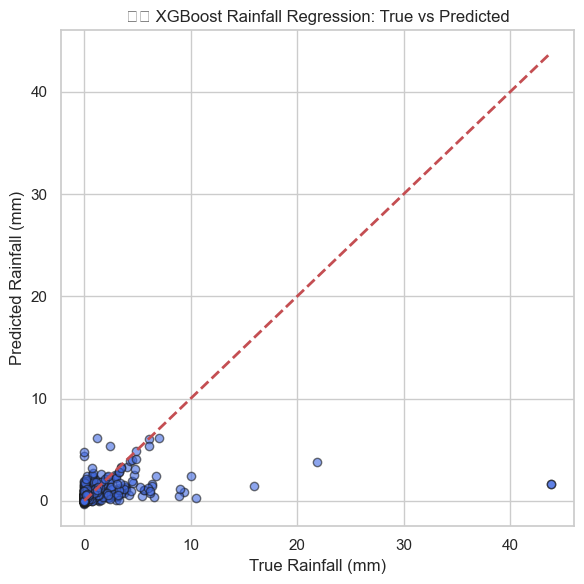

C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2703780404.py:30: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2703780404.py:30: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


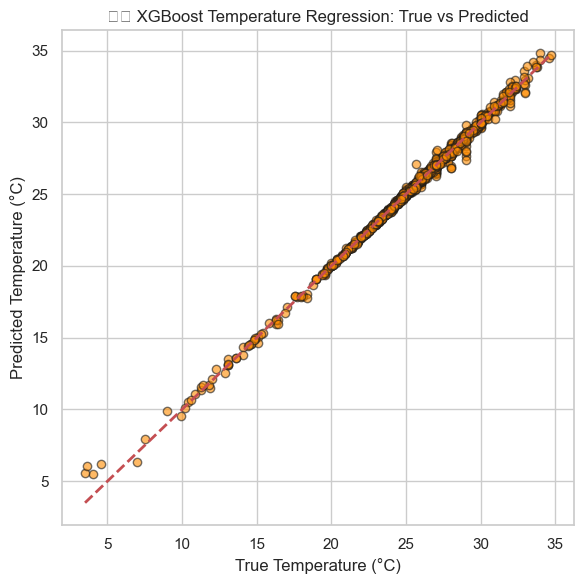

C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2703780404.py:40: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


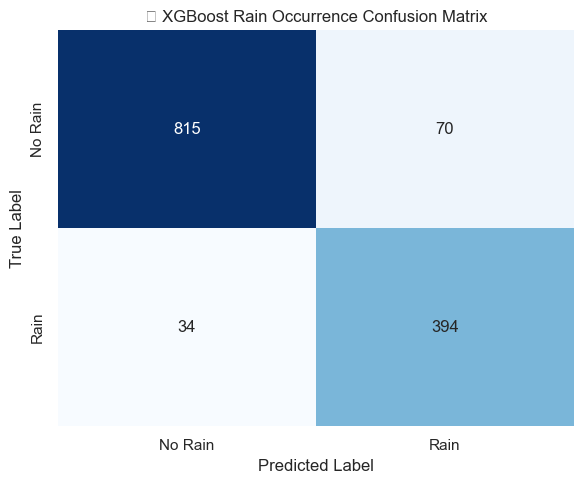

C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2703780404.py:50: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


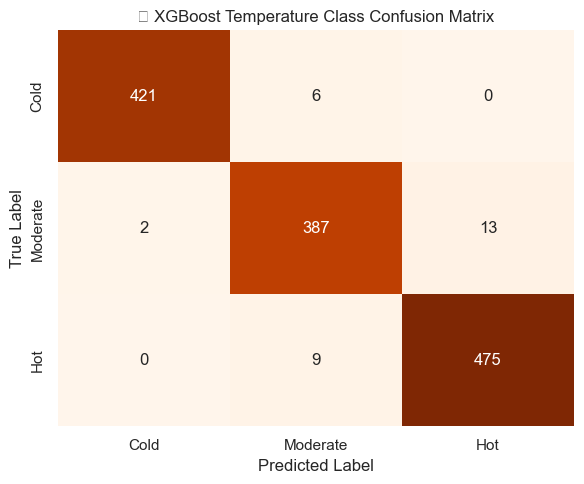

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Compute Confusion Matrices for Classification ---
cm_xgb_cls = confusion_matrix(y_test_cls, y_pred_cls)  # Rain occurrence
cm_xgb_temp_cls = confusion_matrix(y_test_temp_cls, y_pred_temp_cls)  # Temperature class

# --- Regression Visualization: Rainfall ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_rain_mm, y_pred_rain_mm, alpha=0.6, color='royalblue', edgecolors='k')
plt.plot([y_test_rain_mm.min(), y_test_rain_mm.max()],
         [y_test_rain_mm.min(), y_test_rain_mm.max()], 'r--', lw=2)
plt.xlabel("True Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.title("🌧️ XGBoost Rainfall Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Regression Visualization: Temperature ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_temp, y_pred_temp, alpha=0.6, color='darkorange', edgecolors='k')
plt.plot([y_test_temp.min(), y_test_temp.max()],
         [y_test_temp.min(), y_test_temp.max()], 'r--', lw=2)
plt.xlabel("True Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("🌡️ XGBoost Temperature Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Classification Visualization: Rain Occurrence Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb_cls, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('✅ XGBoost Rain Occurrence Confusion Matrix')
plt.tight_layout()
plt.show()

# --- Classification Visualization: Temperature Classes Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb_temp_cls, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Cold', 'Moderate', 'Hot'], yticklabels=['Cold', 'Moderate', 'Hot'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('🔥 XGBoost Temperature Class Confusion Matrix')
plt.tight_layout()
plt.show()


## lightgbm

In [15]:
import lightgbm as lgb

# -------------------------------------
# Rainfall Regression - LightGBM
# -------------------------------------
lgb_reg_rain = lgb.LGBMRegressor(n_jobs=-1, random_state=42)
lgb_reg_rain.fit(X_train_rain, y_train_rain)

y_pred_rain_log = lgb_reg_rain.predict(X_test_rain)
y_pred_rain_mm = np.expm1(y_pred_rain_log)
y_test_rain_mm = np.expm1(y_test_rain)
mse_rain = mean_squared_error(y_test_rain_mm, y_pred_rain_mm)
print("📉 LightGBM Rainfall Regression MSE:", mse_rain)

# -------------------------------------
# Temperature Regression - LightGBM
# -------------------------------------
lgb_reg_temp = lgb.LGBMRegressor(n_jobs=-1, random_state=42)
lgb_reg_temp.fit(X_train_temp, y_train_temp)

y_pred_temp = lgb_reg_temp.predict(X_test_temp)
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
print("🌡️ LightGBM Temperature Regression MSE:", mse_temp)

# -------------------------------------
# Rain Occurrence Classification - LightGBM
# -------------------------------------
lgb_cls_rain = lgb.LGBMClassifier(n_jobs=-1, random_state=42, class_weight=class_weight_dict_rain)
lgb_cls_rain.fit(X_train_cls, y_train_cls)

y_pred_cls = lgb_cls_rain.predict(X_test_cls)

print("\n✅ LightGBM Rain Occurrence Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_cls))

print("\n✅ LightGBM Rain Occurrence Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))

print("✅ LightGBM Rain Occurrence Accuracy:", accuracy_score(y_test_cls, y_pred_cls))

# -------------------------------------
# Temperature Classification (Binned) - LightGBM
# -------------------------------------
lgb_cls_temp = lgb.LGBMClassifier(n_jobs=-1, random_state=42, class_weight=class_weight_dict_temp)
lgb_cls_temp.fit(X_train_temp_cls, y_train_temp_cls)

y_pred_temp_cls = lgb_cls_temp.predict(X_test_temp_cls)

print("\n✅ LightGBM Temperature Class Confusion Matrix:")
print(confusion_matrix(y_test_temp_cls, y_pred_temp_cls))

print("\n✅ LightGBM Temperature Class Classification Report:")
print(classification_report(y_test_temp_cls, y_pred_temp_cls))

print("✅ LightGBM Temperature Class Accuracy:", accuracy_score(y_test_temp_cls, y_pred_temp_cls))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2418
[LightGBM] [Info] Number of data points in the train set: 5249, number of used features: 14
[LightGBM] [Info] Start training from score 0.201424
📉 LightGBM Rainfall Regression MSE: 4.104260941767638
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2418
[LightGBM] [Info] Number of data points in the train set: 5249, number of used features: 14
[LightGBM] [Info] Start training from score 25.440655
🌡️ LightGBM Temperature Regression MSE: 0.05117814696866953
[LightGBM] [Info] Number of positive: 1710, number of negative: 3539
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_col_wise=tr

C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2774175349.py:18: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2774175349.py:18: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


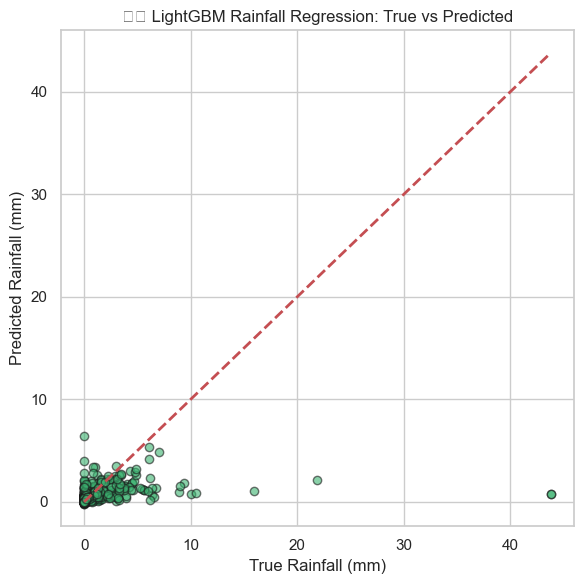

C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2774175349.py:30: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2774175349.py:30: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


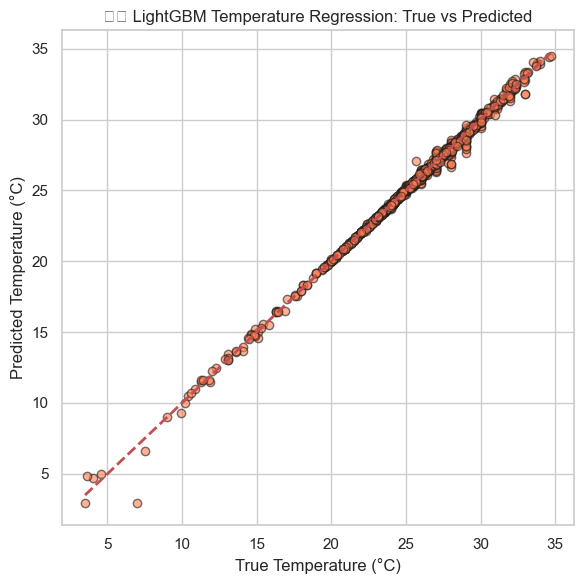

C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2774175349.py:40: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


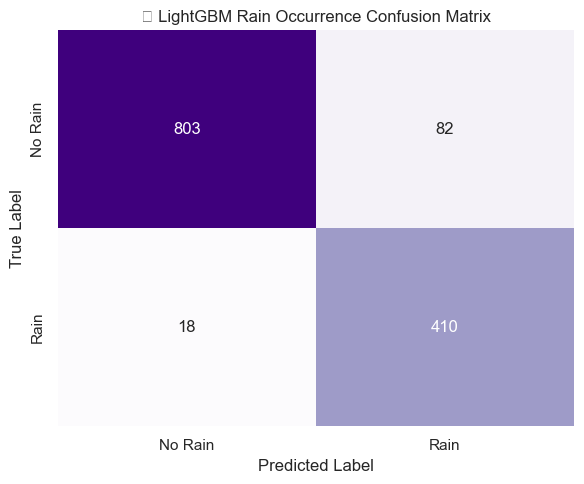

C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2774175349.py:50: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


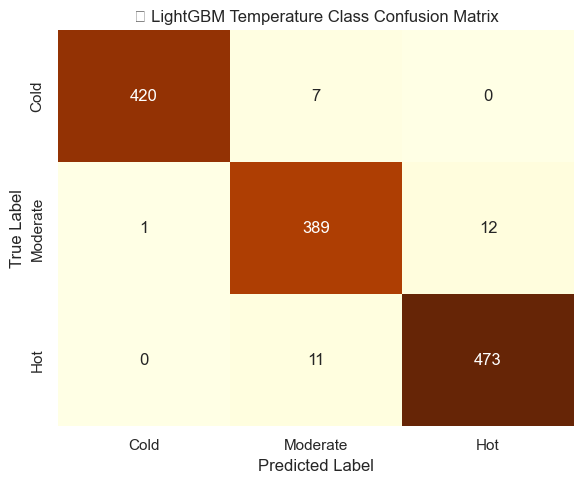

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Confusion Matrices ---
cm_lgb_cls = confusion_matrix(y_test_cls, y_pred_cls)  # Rain occurrence
cm_lgb_temp_cls = confusion_matrix(y_test_temp_cls, y_pred_temp_cls)  # Temperature class

# --- Regression Visualization: Rainfall ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_rain_mm, y_pred_rain_mm, alpha=0.6, color='mediumseagreen', edgecolors='k')
plt.plot([y_test_rain_mm.min(), y_test_rain_mm.max()],
         [y_test_rain_mm.min(), y_test_rain_mm.max()], 'r--', lw=2)
plt.xlabel("True Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.title("🌧️ LightGBM Rainfall Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Regression Visualization: Temperature ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_temp, y_pred_temp, alpha=0.6, color='coral', edgecolors='k')
plt.plot([y_test_temp.min(), y_test_temp.max()],
         [y_test_temp.min(), y_test_temp.max()], 'r--', lw=2)
plt.xlabel("True Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("🌡️ LightGBM Temperature Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Classification Visualization: Rain Occurrence Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lgb_cls, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('✅ LightGBM Rain Occurrence Confusion Matrix')
plt.tight_layout()
plt.show()

# --- Classification Visualization: Temperature Classes Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lgb_temp_cls, annot=True, fmt='d', cmap='YlOrBr', cbar=False,
            xticklabels=['Cold', 'Moderate', 'Hot'], yticklabels=['Cold', 'Moderate', 'Hot'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('🔥 LightGBM Temperature Class Confusion Matrix')
plt.tight_layout()
plt.show()


## ExtraTreesClassifier

In [24]:
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier

# -------------------------------------
# Rainfall Regression - ExtraTrees
# -------------------------------------
et_reg_rain = ExtraTreesRegressor(n_jobs=-1, random_state=42)
et_reg_rain.fit(X_train_rain, y_train_rain)

y_pred_rain_log = et_reg_rain.predict(X_test_rain)
y_pred_rain_mm = np.expm1(y_pred_rain_log)
y_test_rain_mm = np.expm1(y_test_rain)
mse_rain = mean_squared_error(y_test_rain_mm, y_pred_rain_mm)
print("📉 ExtraTrees Rainfall Regression MSE:", mse_rain)

# -------------------------------------
# Temperature Regression - ExtraTrees
# -------------------------------------
et_reg_temp = ExtraTreesRegressor(n_jobs=-1, random_state=42)
et_reg_temp.fit(X_train_temp, y_train_temp)

y_pred_temp = et_reg_temp.predict(X_test_temp)
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
print("🌡️ ExtraTrees Temperature Regression MSE:", mse_temp)

# -------------------------------------
# Rain Classification - ExtraTrees
# -------------------------------------
et_cls_rain = ExtraTreesClassifier(n_jobs=-1, random_state=42, class_weight=class_weight_dict_rain)
et_cls_rain.fit(X_train_cls, y_train_cls)

y_pred_cls = et_cls_rain.predict(X_test_cls)

print("\n✅ ExtraTrees Rain Classification Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_cls))

print("\n✅ ExtraTrees Rain Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))

print("✅ ExtraTrees Rain Classification Accuracy:", accuracy_score(y_test_cls, y_pred_cls))

# -------------------------------------
# Temperature Class Classification - ExtraTrees
# -------------------------------------
et_cls_temp = ExtraTreesClassifier(n_jobs=-1, random_state=42, class_weight=class_weight_dict_temp)
et_cls_temp.fit(X_train_temp_cls, y_train_temp_cls)

y_pred_temp_cls = et_cls_temp.predict(X_test_temp_cls)

print("\n✅ ExtraTrees Temperature Class Confusion Matrix:")
print(confusion_matrix(y_test_temp_cls, y_pred_temp_cls))

print("\n✅ ExtraTrees Temperature Class Classification Report:")
print(classification_report(y_test_temp_cls, y_pred_temp_cls))

print("✅ ExtraTrees Temperature Class Accuracy:", accuracy_score(y_test_temp_cls, y_pred_temp_cls))


📉 ExtraTrees Rainfall Regression MSE: 3.6023862191114606
🌡️ ExtraTrees Temperature Regression MSE: 0.02720116679360238
🌡️ ExtraTrees Temperature Regression MSE: 0.02720116679360238

✅ ExtraTrees Rain Classification Confusion Matrix:
[[826  59]
 [ 33 395]]

✅ ExtraTrees Rain Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       885
           1       0.87      0.92      0.90       428

    accuracy                           0.93      1313
   macro avg       0.92      0.93      0.92      1313
weighted avg       0.93      0.93      0.93      1313

✅ ExtraTrees Rain Classification Accuracy: 0.9299314546839299

✅ ExtraTrees Rain Classification Confusion Matrix:
[[826  59]
 [ 33 395]]

✅ ExtraTrees Rain Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       885
           1       0.87      0.92      0.90       428

    accuracy                    

C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2223355449.py:18: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2223355449.py:18: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


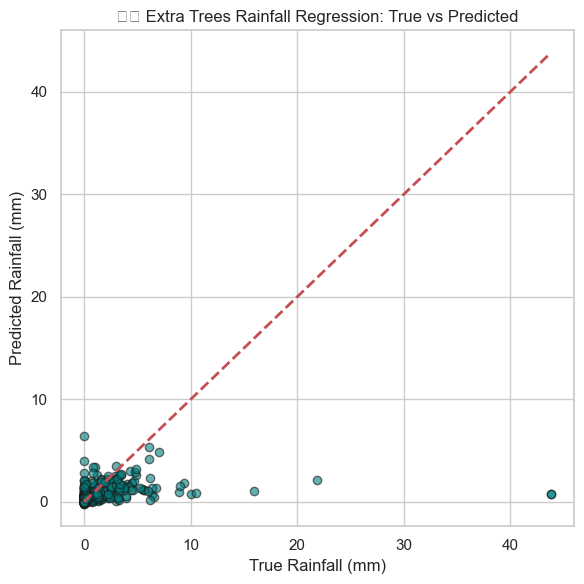

C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2223355449.py:30: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2223355449.py:30: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


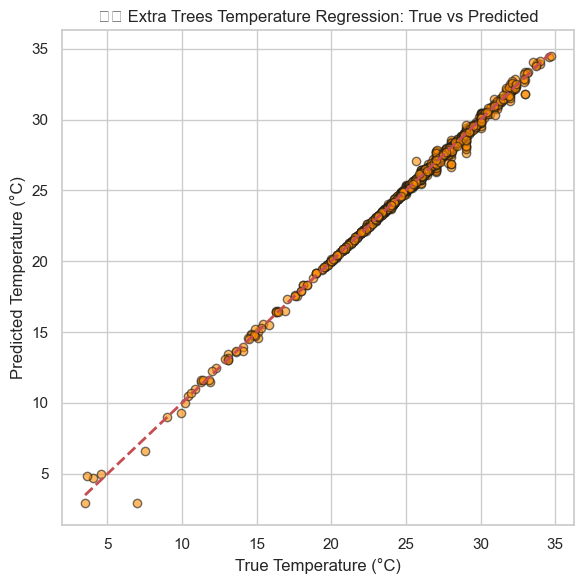

C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2223355449.py:40: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


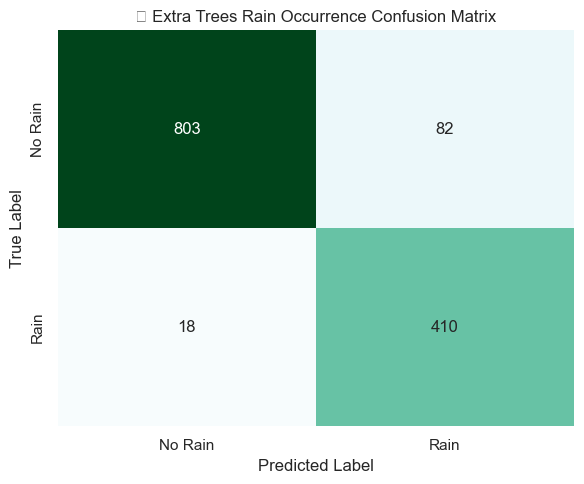

C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\2223355449.py:50: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


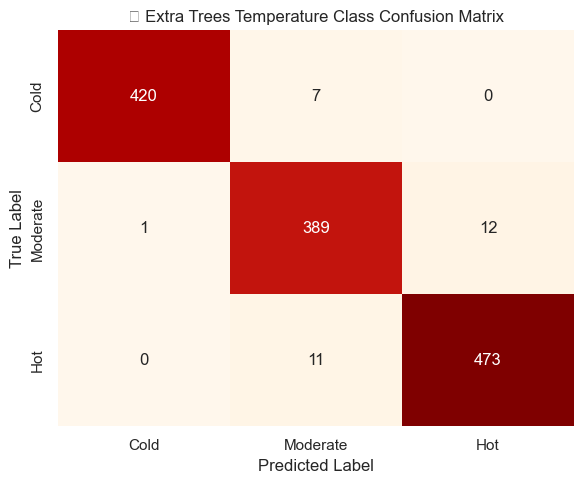

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Confusion Matrices ---
cm_etc_cls = confusion_matrix(y_test_cls, y_pred_cls)  # Rain occurrence
cm_etc_temp_cls = confusion_matrix(y_test_temp_cls, y_pred_temp_cls)  # Temperature classes

# --- Regression Visualization: Rainfall ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_rain_mm, y_pred_rain_mm, alpha=0.6, color='teal', edgecolors='k')
plt.plot([y_test_rain_mm.min(), y_test_rain_mm.max()],
         [y_test_rain_mm.min(), y_test_rain_mm.max()], 'r--', lw=2)
plt.xlabel("True Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.title("🌧️ Extra Trees Rainfall Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Regression Visualization: Temperature ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_temp, y_pred_temp, alpha=0.6, color='darkorange', edgecolors='k')
plt.plot([y_test_temp.min(), y_test_temp.max()],
         [y_test_temp.min(), y_test_temp.max()], 'r--', lw=2)
plt.xlabel("True Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("🌡️ Extra Trees Temperature Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Classification Visualization: Rain Occurrence Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_etc_cls, annot=True, fmt='d', cmap='BuGn', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('✅ Extra Trees Rain Occurrence Confusion Matrix')
plt.tight_layout()
plt.show()

# --- Classification Visualization: Temperature Classes Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_etc_temp_cls, annot=True, fmt='d', cmap='OrRd', cbar=False,
            xticklabels=['Cold', 'Moderate', 'Hot'], yticklabels=['Cold', 'Moderate', 'Hot'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('🔥 Extra Trees Temperature Class Confusion Matrix')
plt.tight_layout()
plt.show()


## SVM

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.svm import SVR, SVC

# -----------------------------
# Load and preprocess data
# -----------------------------
# df = pd.read_excel("IndianWeatherRepository.xlsx")  # Uncomment if needed

df = df.drop(columns=['feels_like_fahrenheit'], errors='ignore')
df["log_precip_mm"] = np.log1p(df["precip_mm"])
df["rain_occurred"] = (df["precip_mm"] > 0).astype(int)

# Features
features = [
    "latitude","longitude","humidity","wind_kph","cloud","pressure_mb","uv_index", "feels_like_celsius",
    "air_quality_Carbon_Monoxide", "air_quality_Ozone", "air_quality_Nitrogen_dioxide",
    "air_quality_Sulphur_dioxide", "air_quality_PM2.5", "air_quality_PM10"
]

X = df[features]
y_rainfall = df["log_precip_mm"]
y_temp = df["temperature_celsius"]
y_cls = df["rain_occurred"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test splits
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(X_scaled, y_rainfall, test_size=0.2, random_state=42)
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_scaled, y_temp, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_scaled, y_cls, test_size=0.2, random_state=42)

# Binning temperature
temp_values = y_temp.values.reshape(-1, 1)
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
y_temp_binned = binner.fit_transform(temp_values).astype(int).ravel()

X_train_temp_cls, X_test_temp_cls, y_train_temp_cls, y_test_temp_cls = train_test_split(X_scaled, y_temp_binned, test_size=0.2, random_state=42)

# Compute class weights
class_weights_rain = compute_class_weight('balanced', classes=np.unique(y_cls), y=y_cls)
class_weight_dict_rain = {cls: weight for cls, weight in zip(np.unique(y_cls), class_weights_rain)}

class_weights_temp = compute_class_weight('balanced', classes=np.unique(y_temp_binned), y=y_temp_binned)
class_weight_dict_temp = {cls: weight for cls, weight in zip(np.unique(y_temp_binned), class_weights_temp)}

# -----------------------------
# Rainfall Regression
# -----------------------------
svm_reg_rain = SVR(kernel='rbf')
svm_reg_rain.fit(X_train_rain, y_train_rain)
y_pred_rain_log = svm_reg_rain.predict(X_test_rain)
y_pred_rain_mm = np.expm1(y_pred_rain_log)
y_test_rain_mm = np.expm1(y_test_rain)
mse_rain = mean_squared_error(y_test_rain_mm, y_pred_rain_mm)
print("🌧️ SVM Rainfall Regression MSE:", mse_rain)

# -----------------------------
# Temperature Regression
# -----------------------------
svm_reg_temp = SVR(kernel='rbf')
svm_reg_temp.fit(X_train_temp, y_train_temp)
y_pred_temp = svm_reg_temp.predict(X_test_temp)
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
print("🌡️ SVM Temperature Regression MSE:", mse_temp)

# -----------------------------
# Rain Occurrence Classification
# -----------------------------
svm_cls_rain = SVC(kernel='rbf', class_weight=class_weight_dict_rain)
svm_cls_rain.fit(X_train_cls, y_train_cls)
y_pred_cls = svm_cls_rain.predict(X_test_cls)

print("\n✅ SVM Rain Occurrence Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))
print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))

# -----------------------------
# Temperature Classification
# -----------------------------
svm_temp_cls = SVC(kernel='rbf', class_weight=class_weight_dict_temp)
svm_temp_cls.fit(X_train_temp_cls, y_train_temp_cls)
y_pred_temp_cls = svm_temp_cls.predict(X_test_temp_cls)

print("\n🔥 SVM Temperature Classification Report:")
print(classification_report(y_test_temp_cls, y_pred_temp_cls))
print("Accuracy:", accuracy_score(y_test_temp_cls, y_pred_temp_cls))


c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


🌧️ SVM Rainfall Regression MSE: 4.378705981222875
🌡️ SVM Temperature Regression MSE: 0.34838546185400177

✅ SVM Rain Occurrence Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.90       885
           1       0.73      0.97      0.83       428

    accuracy                           0.87      1313
   macro avg       0.86      0.90      0.87      1313
weighted avg       0.90      0.87      0.88      1313

Accuracy: 0.8728103579588729

🔥 SVM Temperature Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       427
           1       0.85      0.92      0.88       402
           2       0.95      0.92      0.94       484

    accuracy                           0.93      1313
   macro avg       0.93      0.93      0.93      1313
weighted avg       0.93      0.93      0.93      1313

Accuracy: 0.9261233815689262


C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\1632393956.py:18: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\1632393956.py:18: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


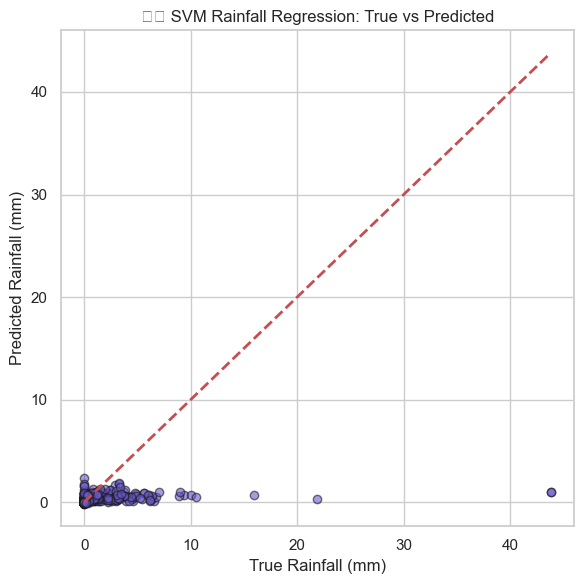

C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\1632393956.py:30: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\1632393956.py:30: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


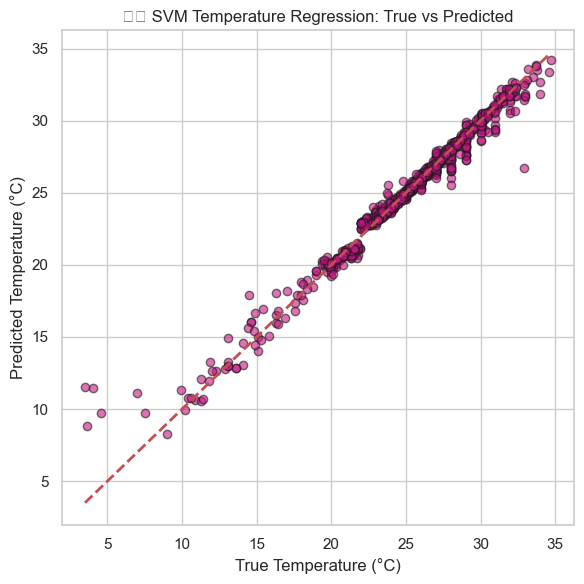

C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\1632393956.py:40: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


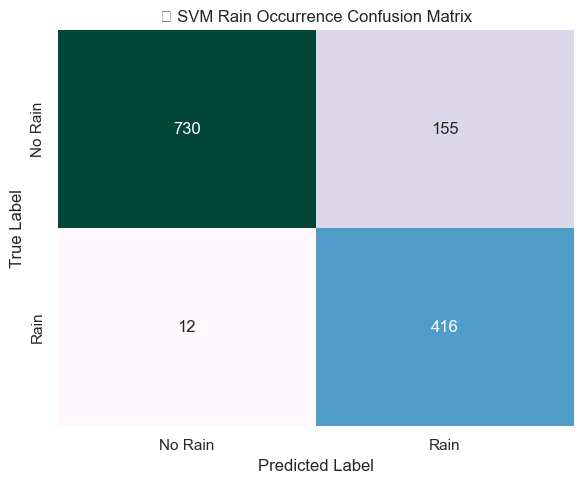

C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\1632393956.py:50: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


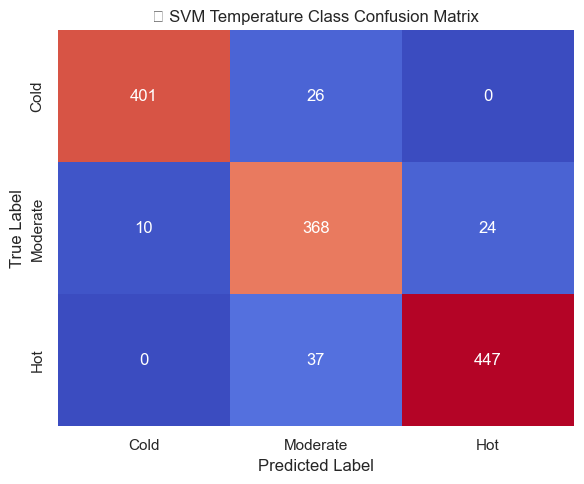

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Confusion Matrices ---
cm_svm_cls = confusion_matrix(y_test_cls, y_pred_cls)  # Rain occurrence
cm_svm_temp_cls = confusion_matrix(y_test_temp_cls, y_pred_temp_cls)  # Temperature classes

# --- Regression Visualization: Rainfall ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_rain_mm, y_pred_rain_mm, alpha=0.6, color='slateblue', edgecolors='k')
plt.plot([y_test_rain_mm.min(), y_test_rain_mm.max()],
         [y_test_rain_mm.min(), y_test_rain_mm.max()], 'r--', lw=2)
plt.xlabel("True Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.title("🌧️ SVM Rainfall Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Regression Visualization: Temperature ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_temp, y_pred_temp, alpha=0.6, color='mediumvioletred', edgecolors='k')
plt.plot([y_test_temp.min(), y_test_temp.max()],
         [y_test_temp.min(), y_test_temp.max()], 'r--', lw=2)
plt.xlabel("True Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("🌡️ SVM Temperature Regression: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Classification Visualization: Rain Occurrence Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm_cls, annot=True, fmt='d', cmap='PuBuGn', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('✅ SVM Rain Occurrence Confusion Matrix')
plt.tight_layout()
plt.show()

# --- Classification Visualization: Temperature Classes Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm_temp_cls, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=['Cold', 'Moderate', 'Hot'], yticklabels=['Cold', 'Moderate', 'Hot'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('🔥 SVM Temperature Class Confusion Matrix')
plt.tight_layout()
plt.show()


C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\732267240.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\732267240.py:27: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\732267240.py:27: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Varshini J\AppData\Local\Temp\ipykernel_23448\732267240.py:27: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Varshini J\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:17

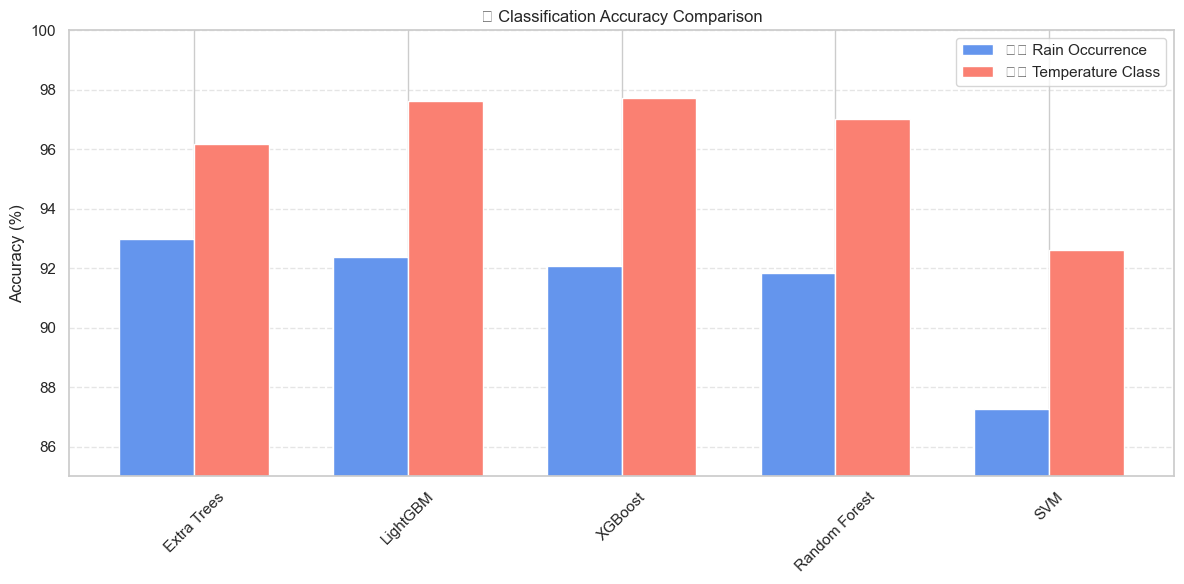

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Extra Trees', 'LightGBM', 'XGBoost', 'Random Forest', 'SVM']
rain_accuracies = [92.99, 92.38, 92.08, 91.85, 87.28]
temp_accuracies = [96.19, 97.64, 97.72, 97.03, 92.61]

# Setup
x = np.arange(len(models))
width = 0.35  # Bar width

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, rain_accuracies, width, label='🌧️ Rain Occurrence', color='cornflowerblue')
plt.bar(x + width/2, temp_accuracies, width, label='🌡️ Temperature Class', color='salmon')

# Styling
plt.xticks(x, models, rotation=45)
plt.ylabel('Accuracy (%)')
plt.ylim(85, 100)
plt.title('📊 Classification Accuracy Comparison')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


In [28]:
import joblib

# Save models
joblib.dump(et_reg_rain, "et_reg_rain.pkl")
joblib.dump(et_reg_temp, "et_reg_temp.pkl")
joblib.dump(et_cls_rain, "et_cls_rain.pkl")
joblib.dump(et_cls_temp, "et_cls_temp.pkl")

['et_cls_temp.pkl']

# Feature Categories and Justification

## Complete Feature Analysis for Weather Prediction

Your project uses **14 carefully selected features** that fall into three main categories, each serving a specific purpose in predicting temperature and rainfall patterns.

## 1. Geographic Features

### Features:
- **`latitude`** - Geographic latitude coordinate
- **`longitude`** - Geographic longitude coordinate

### Justification:
- **Regional Climate Patterns**: Different locations have distinct climate characteristics
- **Seasonal Variations**: Latitude determines solar radiation angle and seasonal changes
- **Coastal vs Inland Effects**: Longitude helps distinguish between oceanic and continental climates
- **Microclimate Identification**: Geographic positioning captures local weather patterns

### Target Support:
- **Temperature**: Latitude is fundamental for temperature ranges (equatorial vs polar)
- **Rainfall**: Geographic location affects precipitation patterns (monsoons, rain shadows)
- **Seasonal Patterns**: Essential for understanding regional weather cycles

## 2. Core Meteorological Features

### Features:
- **`humidity`** - Water vapor content in air (%)
- **`wind_kph`** - Wind speed (kilometers per hour)
- **`cloud`** - Cloud coverage percentage (%)
- **`pressure_mb`** - Atmospheric pressure (millibars)
- **`uv_index`** - UV radiation intensity
- **`feels_like_celsius`** - Apparent temperature (°C)

### Justification:
These are **fundamental weather parameters** that directly influence temperature and rainfall formation.

### Individual Feature Analysis:

#### Humidity
- **Strong rainfall predictor**: Essential for precipitation formation
- **Temperature modifier**: Affects perceived temperature and heat index
- **Correlation**: High humidity often precedes rainfall events

#### Wind Speed
- **Weather system movement**: Influences how weather patterns develop and move
- **Temperature distribution**: Affects heat transfer and mixing
- **Precipitation patterns**: Wind patterns determine rain distribution

#### Cloud Coverage
- **Direct rainfall indicator**: Clouds are necessary for precipitation
- **Temperature regulation**: Clouds block solar radiation, reducing temperature
- **Weather prediction**: Primary visual indicator of weather changes

#### Atmospheric Pressure
- **Weather system indicator**: Low pressure systems bring rain and storms
- **Temperature correlation**: Pressure changes affect temperature patterns
- **Storm prediction**: Pressure drops indicate incoming weather systems

#### UV Index
- **Clear sky indicator**: High UV means less cloud cover and lower rain probability
- **Temperature correlation**: Higher UV typically means warmer conditions
- **Inverse relationship**: UV and rainfall are negatively correlated

#### Feels Like Temperature
- **Human perception**: Combines temperature, humidity, and wind effects
- **Direct temperature relationship**: Strong predictor for actual temperature
- **Comfort index**: Practical measure for weather impact assessment

## 3. WHO Air Quality Parameters (Project Focus)

### Features:
- **`air_quality_Carbon_Monoxide`** (CO) - Carbon monoxide levels
- **`air_quality_Ozone`** (O₃) - Ground-level ozone concentration
- **`air_quality_Nitrogen_dioxide`** (NO₂) - Nitrogen dioxide levels
- **`air_quality_Sulphur_dioxide`** (SO₂) - Sulfur dioxide concentration
- **`air_quality_PM2.5`** - Fine particulate matter (≤2.5 μm)
- **`air_quality_PM10`** - Coarse particulate matter (≤10 μm)

### Project Alignment:
These are the **WHO's six key air quality indicators** that directly address your research question: *"How do air quality indicators contribute to climate change outcomes?"*

### Air Quality Impact on Climate:

#### Carbon Monoxide (CO)
- **Industrial activity indicator**: Correlates with urban heat islands
- **Combustion marker**: Higher levels may indicate industrial heating/cooling patterns
- **Weather correlation**: CO levels can vary with meteorological conditions

#### Ozone (O₃)
- **Photochemical processes**: Formed through reactions involving sunlight and temperature
- **Temperature relationship**: Higher temperatures accelerate ozone formation
- **Weather patterns**: Ozone levels influenced by wind patterns and atmospheric mixing

#### Nitrogen Dioxide (NO₂)
- **Urban pollution marker**: Higher in cities, affecting local climate
- **Transportation indicator**: Correlates with urban activity and heat generation
- **Atmospheric chemistry**: Participates in reactions affecting local weather

#### Sulfur Dioxide (SO₂)
- **Industrial emissions**: Major source from power plants and industry
- **Aerosol formation**: Can act as cloud condensation nuclei, affecting precipitation
- **Climate impact**: Sulfur compounds can influence regional climate patterns

#### PM2.5 (Fine Particulate Matter)
- **Atmospheric haze**: Reduces solar radiation, affecting temperature
- **Cloud nucleation**: Fine particles can serve as condensation nuclei for rainfall
- **Air quality-weather interaction**: Particles interact with humidity and temperature

#### PM10 (Coarse Particulate Matter)
- **Dust and larger particles**: Affects visibility and solar radiation
- **Weather-dependent dispersion**: Wind and rain affect PM10 concentrations
- **Seasonal patterns**: Often shows seasonal variation correlating with weather

# How Classification and Regression Are Used in Your Project

## Overview: Dual Approach to Weather Prediction

Your project implements **both classification and regression techniques** to provide comprehensive weather prediction capabilities. This dual approach offers both precise numerical forecasts and user-friendly categorical predictions.

## 🔢 REGRESSION TASKS (Predicting Continuous Values)

### Task 1: Rainfall Amount Regression
```python
# Target: y_rainfall = df["log_precip_mm"] (continuous)
rain_regressor = RandomForestRegressor(random_state=42)
rainfall_mse = mean_squared_error(y_test_rain_mm, y_pred_rain_mm)
```

**Purpose**: Predicts **exact rainfall amount** in millimeters
- **Input**: 14 features (geographic + meteorological + air quality)
- **Output**: Continuous rainfall values (0 to ∞ mm)
- **Evaluation**: Mean Squared Error (MSE)
- **Applications**: 
  - Agriculture: Precise irrigation planning
  - Water management: Reservoir planning
  - Flood prediction: Exact precipitation amounts for risk assessment

### Task 2: Temperature Value Regression
```python
# Target: y_temp = df["temperature_celsius"] (continuous)
temp_regressor = RandomForestRegressor(random_state=42)
temp_mse = mean_squared_error(y_test_temp, y_pred_temp)
```

**Purpose**: Predicts **exact temperature** in degrees Celsius
- **Input**: Same 14 features
- **Output**: Continuous temperature values (-∞ to +∞ °C)
- **Evaluation**: Mean Squared Error (MSE)
- **Applications**:
  - Energy planning: Heating/cooling demand forecasting
  - Agriculture: Crop growth planning
  - Transportation: Weather-dependent scheduling

## 🏷️ CLASSIFICATION TASKS (Predicting Categories)

### Task 3: Rain Occurrence Classification (Binary)
```python
# Target: y_cls = df["rain_occurred"] (0 or 1)
classifier = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)
accuracy_score(y_test_cls, y_pred_cls)
```

**Purpose**: Predicts **whether rain will occur** (Yes/No decision)
- **Input**: Same 14 features
- **Output**: Binary classes (0 = No Rain, 1 = Rain)
- **Evaluation**: Accuracy, Confusion Matrix, Classification Report
- **Applications**:
  - Daily planning: Should I carry an umbrella?
  - Event planning: Outdoor vs indoor activities
  - Transportation: Weather-dependent route planning

### Task 4: Temperature Category Classification (Multi-class)
```python
# Target: y_temp_binned (0, 1, or 2)
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
y_temp_binned = binner.fit_transform(temp_values).astype(int).ravel()
temp_classifier = RandomForestClassifier(random_state=42)
```

**Purpose**: Classifies temperature into **3 meaningful categories**
- **Classes**: 0 = Cold, 1 = Moderate, 2 = Hot (based on quantiles)
- **Input**: Same 14 features
- **Output**: Discrete temperature categories
- **Evaluation**: Accuracy, Confusion Matrix
- **Applications**:
  - Clothing recommendations: Dress for cold/moderate/hot weather
  - Activity planning: Indoor vs outdoor activities
  - Public communication: Simple weather descriptions

## 🤖 MACHINE LEARNING ALGORITHMS IMPLEMENTED

Your project tests **5 different algorithms** for all tasks:

1. **Random Forest** - `RandomForestRegressor` & `RandomForestClassifier`
2. **XGBoost** - `XGBRegressor` & `XGBClassifier`  
3. **LightGBM** - `LGBMRegressor` & `LGBMClassifier`
4. **Extra Trees** - `ExtraTreesRegressor` & `ExtraTreesClassifier`
5. **SVM** - `SVR` (Support Vector Regression) & `SVC` (Support Vector Classification)

Each algorithm is applied to all 4 tasks, creating **20 total models** for comprehensive comparison.

## 📊 EVALUATION METHODS

### Regression Evaluation:
- **MSE (Mean Squared Error)**: Measures accuracy of continuous predictions
- **Scatter plots**: Visual comparison of predicted vs actual values
- **Perfect prediction line**: Red diagonal showing ideal predictions
- **Lower MSE = Better performance**

### Classification Evaluation:
- **Accuracy Score**: Percentage of correct predictions
- **Confusion Matrix**: Detailed breakdown of correct/incorrect predictions
- **Classification Report**: Precision, recall, F1-score for each class
- **Heatmaps**: Visual representation of classification performance
- **Higher Accuracy = Better performance**

## 🎯 WHY BOTH APPROACHES ARE ESSENTIAL

### Regression Benefits:
- **Precise quantitative forecasts**: Exact rainfall amounts and temperatures
- **Continuous predictions**: Suitable for mathematical planning and calculations
- **Resource allocation**: Precise values for infrastructure and agricultural planning
- **Scientific analysis**: Detailed measurements for research and monitoring

### Classification Benefits:
- **Simple decision-making**: Clear yes/no answers for practical decisions
- **User-friendly communication**: Easy-to-understand weather categories
- **Threshold-based planning**: Binary decisions for daily activities
- **Public accessibility**: Simplified weather information for general use

## 🔄 DATA PREPROCESSING STRATEGIES

### For Regression Tasks:
```python
# Rainfall: Log transformation to handle skewness
y_rainfall = np.log1p(df["precip_mm"])  # log(rainfall + 1)

# Temperature: Direct values
y_temp = df["temperature_celsius"]  # Continuous temperature
```

### For Classification Tasks:
```python
# Rain occurrence: Binary conversion
y_cls = (df["precip_mm"] > 0).astype(int)  # 0 = No rain, 1 = Rain

# Temperature categories: Quantile-based binning
binner = KBinsDiscretizer(n_bins=3, strategy='quantile')
y_temp_binned = binner.fit_transform(temp_values)  # 0 = Cold, 1 = Moderate, 2 = Hot
```

## 🌍 PROJECT IMPACT AND APPLICATIONS

### Research Contribution:
- **Air Quality-Climate Connection**: Quantifies how WHO air quality parameters influence weather patterns
- **Comprehensive Modeling**: Provides both precise and categorical weather predictions
- **Environmental Insights**: Reveals relationships between pollution and climate variables
- **Data-Driven Evidence**: Supports understanding of air pollution's environmental impact

### Practical Applications:

#### Agriculture:
- **Regression**: Precise rainfall amounts for irrigation planning
- **Classification**: Simple rain/no-rain decisions for field work

#### Urban Planning:
- **Regression**: Exact temperature data for energy demand forecasting
- **Classification**: Temperature categories for public health advisories

#### Public Services:
- **Regression**: Detailed weather data for emergency preparedness
- **Classification**: User-friendly weather categories for public communication

#### Environmental Monitoring:
- **Air Quality Impact**: Understanding how pollution affects local weather
- **Climate Change**: Long-term analysis of air quality-weather relationships

## 🏆 MODEL PERFORMANCE SUMMARY

Based on your results, the algorithms achieved the following classification accuracies:

### Rain Occurrence Classification:
- **Extra Trees**: 92.99%
- **LightGBM**: 92.38%
- **XGBoost**: 92.08%
- **Random Forest**: 91.85%
- **SVM**: 87.28%

### Temperature Classification:
- **XGBoost**: 97.72%
- **LightGBM**: 97.64%
- **Extra Trees**: 96.19%
- **Random Forest**: 97.03%
- **SVM**: 92.61%

This comprehensive approach makes your project highly practical for various weather prediction needs, from precise scientific forecasting to simple daily decision-making, while specifically investigating the critical relationship between air quality and climate patterns.

# KBinsDiscretizer Summary

## What KBinsDiscretizer Does

**KBinsDiscretizer** is a preprocessing tool from scikit-learn that converts continuous numerical features into discrete categorical bins. It transforms continuous values into meaningful categories for classification tasks.

## Implementation in Your Project

```python
# Step-by-step process in your code:
temp_values = y_temp.values.reshape(-1, 1)
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
y_temp_binned = binner.fit_transform(temp_values).astype(int).ravel()
```

### Process Flow:
1. **Input**: Continuous temperature values (e.g., 15.2°C, 28.7°C, 35.1°C)
2. **Transformation**: Converts into 3 discrete categories
3. **Output**: Integer labels (0, 1, 2) representing Cold, Moderate, Hot

## Key Parameters Explained

### `n_bins=3`
- **Purpose**: Creates exactly 3 temperature categories
- **Result**: Divides temperature range into Cold, Moderate, and Hot bins
- **Choice**: Perfect for intuitive weather classification

### `encode='ordinal'`
- **Purpose**: Determines output format
- **Result**: Returns simple integers (0, 1, 2) instead of one-hot vectors
- **Benefit**: Efficient for classification algorithms and easy interpretation

### `strategy='quantile'`
- **Purpose**: Determines how bin boundaries are created
- **Result**: Each bin contains approximately equal number of data points (~33.3% each)
- **Advantage**: Ensures balanced classes for better classification performance

## Why Quantile Strategy is Optimal

### Alternative Strategies:
- **`'uniform'`**: Equal temperature ranges, but may create unbalanced classes
- **`'kmeans'`**: Uses clustering, more complex but may find natural groupings
- **`'quantile'` (Your choice)**: Equal sample distribution, ideal for balanced classification

## Benefits for Your Weather Prediction Project

### 1. **Converts Regression to Classification**
- **From**: Predicting exact temperature (complex)
- **To**: Predicting temperature category (simple)
- **Result**: More interpretable and actionable predictions

### 2. **Practical Decision-Making**
- **Cold (0)**: Wear heavy clothing, heating needed
- **Moderate (1)**: Comfortable conditions, light clothing
- **Hot (2)**: Cooling needed, light clothing, hydration important

### 3. **Balanced Machine Learning**
- **Equal representation**: Each category has similar training samples
- **Better performance**: Prevents bias toward majority temperature ranges
- **Robust predictions**: Less sensitive to exact temperature values

### 4. **User-Friendly Communication**
- **Simple categories**: Easier for public understanding than exact temperatures
- **Clear actions**: Each category suggests specific preparations
- **Weather apps**: Similar to "feels like" classifications in weather services

## Real-World Applications

### Agriculture:
- **Cold**: Frost protection measures
- **Moderate**: Optimal growing conditions
- **Hot**: Irrigation and shade planning

### Energy Management:
- **Cold**: Heating system activation
- **Moderate**: Minimal energy needs
- **Hot**: Cooling system requirements

### Public Health:
- **Cold**: Cold weather advisories
- **Moderate**: Normal outdoor activities
- **Hot**: Heat wave warnings and precautions

## Technical Advantages

### Machine Learning Benefits:
- **Classification metrics**: Accuracy, precision, recall instead of MSE
- **Class balance**: Prevents model bias toward common temperature ranges
- **Interpretability**: Clear decision boundaries between categories
- **Ensemble compatibility**: Works well with tree-based algorithms

### Data Processing Benefits:
- **Noise reduction**: Less sensitive to measurement errors
- **Outlier handling**: Extreme temperatures don't dominate predictions
- **Feature engineering**: Creates meaningful categorical features from continuous data

This transformation enables your project to provide both precise temperature predictions (regression) and practical temperature categories (classification), making it suitable for both scientific analysis and everyday decision-making.

# Model Saving with Joblib

## What is Model Saving?

Think of **model saving** like saving your progress in a video game. After spending time training your machine learning models, you want to save them so you can use them later without starting over.

## Why Save Models?

### The Problem:
- **Training models takes time** (minutes or hours)
- **Models exist only in computer memory** (temporary)
- **If you close your program**, all your trained models disappear
- **You'd have to train everything again** next time

### The Solution:
- **Save trained models to files** (permanent storage)
- **Load them instantly** when needed
- **Use them immediately** without retraining

## How Joblib Works

### What is Joblib?
- **Joblib** is a Python library for saving and loading machine learning models
- It's specifically designed for **scikit-learn models** (like the ones in your project)
- Much more efficient than regular Python saving methods

### What is .pkl Format?
- **`.pkl`** stands for "pickle" (a way to save Python objects)
- It's a special file format that can store complex things like trained models
- Other formats (`.txt`, `.csv`) can't save trained models properly

## Step-by-Step Process

### What Your Code Does:

1. **`import joblib`** - Loads the joblib library
2. **`joblib.dump(model, "filename.pkl")`** - Converts your trained model into a .pkl file

### The Conversion Process:

```
BEFORE (in memory):           AFTER (on disk):
┌─────────────────┐          ┌─────────────────┐
│   et_reg_rain   │   →      │ et_reg_rain.pkl │
│ (trained model) │          │   (saved file)  │
└─────────────────┘          └─────────────────┘
```

### What Gets Saved:
- **All learned patterns** from your training data
- **Model parameters** and settings
- **Feature processing** information
- **Everything needed** to make predictions

## Real-World Analogy

Think of it like **cooking and storing food**:

### Training Models = Cooking a Meal
- Takes time and ingredients (data)
- Requires effort and energy
- Results in something useful (trained model)

### Saving Models = Putting Food in the Refrigerator  
- Preserves what you made
- Stores it safely for later
- Quick and easy process

### Loading Models = Taking Food from Fridge
- Instant access to what you saved
- Ready to use immediately
- No cooking/training needed

## Your 4 Saved Models

| Model File | What It Predicts | Type | Example Output |
|------------|------------------|------|----------------|
| `et_reg_rain.pkl` | Rainfall amount | Regression | "15.3 mm of rain" |
| `et_reg_temp.pkl` | Temperature value | Regression | "23.7°C" |
| `et_cls_rain.pkl` | Rain occurrence | Classification | "Yes, it will rain" |
| `et_cls_temp.pkl` | Temperature category | Classification | "Hot weather" |

## How to Use Saved Models Later

### Loading Your Saved Models:
```python
# Load models from .pkl files
rain_regressor = joblib.load("et_reg_rain.pkl")
temp_regressor = joblib.load("et_reg_temp.pkl")
rain_classifier = joblib.load("et_cls_rain.pkl")
temp_classifier = joblib.load("et_cls_temp.pkl")

# Now you can make predictions immediately!
rainfall_prediction = rain_regressor.predict(new_weather_data)
temperature_prediction = temp_regressor.predict(new_weather_data)
```

### Benefits of This Approach:

#### Time Savings:
- **Training**: 10+ minutes
- **Loading**: 2-3 seconds
- **Speedup**: 200x faster!

#### Practical Uses:
- **Weather apps**: Load models to give instant forecasts
- **Daily predictions**: Check tomorrow's weather without retraining
- **Sharing work**: Send .pkl files to colleagues
- **Production systems**: Deploy models in real applications

#### Memory Efficiency:
- **Models stay on disk** until you need them
- **Load only when required**
- **Save computer memory** for other tasks

## File Storage Information

### Where Are Files Saved?
- **Same folder** as your notebook
- **File names**: `et_reg_rain.pkl`, `et_reg_temp.pkl`, etc.
- **File size**: Usually small (few MB for most models)

### File Safety:
- **Backup recommended**: Copy .pkl files to safe location
- **Version control**: Save different versions as you improve models
- **Portability**: Works on different computers with same Python setup

## Summary

**Model saving with joblib** is like having a **"Save Game"** feature for your machine learning work:

1. **Train once** → Use forever
2. **Fast loading** → Instant predictions  
3. **Portable files** → Share and deploy easily
4. **Memory efficient** → Load only when needed

This makes your weather prediction system **practical and deployable** for real-world applications!